In [30]:
import iris
import numpy
import glob
import re
from iris.experimental.equalise_cubes import equalise_attributes

import matplotlib.pyplot as plt
import seaborn

In [31]:
%matplotlib inline

In [45]:
infiles = glob.glob("/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_*.nc")

In [46]:
print infiles

['/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_187101-188012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_193101-194012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_195101-196012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_200601-201212.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_200101-200512.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_Oyr_CanESM2_historicalGHG_r1i1p1_185001-186012.nc', '/g/data/r87/dbi599/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/yr/ocean/so/r1i1p1/dedrifted/so_O

In [47]:
def get_time_constraint(time_list):
    """Get the time constraint used for reading an iris cube."""
    
    start_date, end_date = time_list

    date_pattern = '([0-9]{4})-([0-9]{1,2})-([0-9]{1,2})'
    assert re.search(date_pattern, start_date)
    assert re.search(date_pattern, end_date)

    if (start_date == end_date):
        year, month, day = start_date.split('-')    
        time_constraint = iris.Constraint(time=iris.time.PartialDateTime(year=int(year), month=int(month), day=int(day)))
    else:  
        start_year, start_month, start_day = start_date.split('-') 
        end_year, end_month, end_day = end_date.split('-')
        time_constraint = iris.Constraint(time=lambda t: iris.time.PartialDateTime(year=int(start_year), month=int(start_month), day=int(start_day)) <= t.point <= iris.time.PartialDateTime(year=int(end_year), month=int(end_month), day=int(end_day)))

    return time_constraint

In [48]:
time_constraint = get_time_constraint(['1986-01-01', '2005-12-31'])

In [50]:
with iris.FUTURE.context(cell_datetime_objects=True):
    cube = iris.load(infiles, 'sea_water_salinity' & time_constraint)

In [51]:
print cube

0: sea_water_salinity / (g/kg)         (time: 5; depth: 40; latitude: 192; longitude: 256)
1: sea_water_salinity / (g/kg)         (time: 5; depth: 40; latitude: 192; longitude: 256)
2: sea_water_salinity / (g/kg)         (time: 10; depth: 40; latitude: 192; longitude: 256)


In [52]:
equalise_attributes(cube)
iris.util.unify_time_units(cube)
cube = cube.concatenate_cube()

In [53]:
print cube

sea_water_salinity / (g/kg)         (time: 20; depth: 40; latitude: 192; longitude: 256)
     Dimension coordinates:
          time                           x          -             -               -
          depth                          -          x             -               -
          latitude                       -          -             x               -
          longitude                      -          -             -               x
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_parent_runid: IGA
          CCCma_runid: IBU
          Conventions: CF-1.5
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_CanESM2_historicalGHG_r0i0p0.nc...
          branch_time: 171915.0
          branch_time_YMDH: 2321:01:01:00
          cmor_version: 2.5.4
          contact: cccma_info@ec.gc.ca
          drift_removal: Masked 0 of 19660

In [54]:
mean_field = cube.collapsed('time', iris.analysis.MEAN)

In [55]:
print mean_field

sea_water_salinity / (g/kg)         (depth: 40; latitude: 192; longitude: 256)
     Dimension coordinates:
          depth                           x             -               -
          latitude                        -             x               -
          longitude                       -             -               x
     Scalar coordinates:
          time: 1996-01-01 00:00:00, bound=(1986-01-01 00:00:00, 2006-01-01 00:00:00)
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_parent_runid: IGA
          CCCma_runid: IBU
          Conventions: CF-1.5
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_CanESM2_historicalGHG_r0i0p0.nc...
          branch_time: 171915.0
          branch_time_YMDH: 2321:01:01:00
          cmor_version: 2.5.4
          contact: cccma_info@ec.gc.ca
          drift_removal: Masked 0 of 1966080 points bec

In [56]:
volcello = '/g/data/ua6/drstree/CMIP5/GCM/CCCMA/CanESM2/historicalGHG/fx/ocean/volcello/r0i0p0/volcello_fx_CanESM2_historicalGHG_r0i0p0.nc'
volume = iris.load_cube(volcello)

In [57]:
print volume

ocean_volume / (m3)                 (depth: 40; latitude: 192; longitude: 256)
     Dimension coordinates:
          depth                           x             -               -
          latitude                        -             x               -
          longitude                       -             -               x
     Attributes:
          CCCma_data_licence: 1) GRANT OF LICENCE - The Government of Canada (Environment Canada) is...
          CCCma_parent_runid: IGA
          CCCma_runid: IGS
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          branch_time: 135415.0
          branch_time_YMDH: 2221:01:01:00
          cmor_version: 2.5.4
          comment: grid-cell volume ca. 2000.
          contact: cccma_info@ec.gc.ca
          creation_date: 2011-05-04T17:19:42Z
          experiment: GHG-only
          experiment_id: historicalGHG
          forcing: GHG (GHG includes CO2,CH4,N2O,CFC

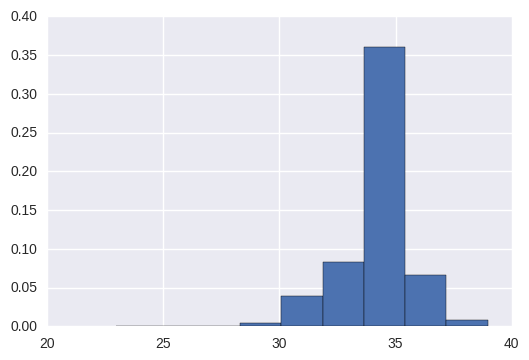

In [58]:
#matplotlib.pyplot.hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

plt.hist(mean_field.data.compressed(), weights=volume.data.compressed(), normed=True)
plt.show()

In [35]:
print mean_field.data.shape

(40, 192, 256)


In [40]:
mean_field.data.compressed().shape

(1075296,)

In [41]:
40 * 192 * 256

1966080